[1. Сколько пользователей, которые совершили покупку только один раз?](#1)

[2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?](#2)

[3. По каждому товару определить, в какой день недели товар чаще всего покупается?](#3)

[4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?](#4)

In [1]:
import pandas as pd
import seaborn as sns
sns.set(font_scale=2, style="whitegrid", rc={'figure.figsize' : (20,7)}
        )
df_customers  = pd.read_csv('https://drive.google.com/uc?id=1P7oRu4FiJM2Vp8pd0YnmDybb-k2NYZuM') 
df_orders     = pd.read_csv('https://drive.google.com/uc?id=1YImQmfaKE5hM-k1jhczuGhj4jycc5Rmh')
df_items      = pd.read_csv('https://drive.google.com/uc?id=1q_mVm-lkLQU1fj0CSCY-j8ru5lzauFNb')

In [2]:
df_customers.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP


In [3]:
df_orders.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [4]:
df_items.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


Посмотрим: чем отличаются customer_id и customer_unique_id

In [5]:
df_customers.groupby('customer_unique_id')\
            .customer_zip_code_prefix\
            .count()\
            .sort_values(ascending = False)

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
6469f99c1f9dfae7733b25662e7f1782     7
ca77025e7201e3b30c44b472ff346268     7
                                    ..
ffe7752edcf14b5819058b1948e02f3a     1
ffe780a8995715d9560ca10f3351710f     1
ffe8f2fc0cee48f79934bd2c506fafc0     1
ffe9102bb78a76921ba0ff3c4659616a     1
ffe96201d466b0e0dc8139850be29d5d     1
Name: customer_zip_code_prefix, Length: 96096, dtype: int64

customer_unique_id - уникальны для пользователей, но не для таблицы пользователей

In [6]:
df_customers.loc[df_customers.customer_unique_id == '8d50f5eadf50201ccdcedfb9e2ac8455'].head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
14186,1bd3585471932167ab72a84955ebefea,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
15321,a8fabc805e9a10a3c93ae5bff642b86b,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
16654,897b7f72042714efaa64ac306ba0cafc,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP


Видим, что для одного пользователя может быть несколько customer_id
Посмотрим что такое customer_id

In [16]:
df_customers.customer_id.nunique()

99441

In [17]:
df_customers.customer_id.nunique() == len(df_customers) 

True

customer_id уникальны для таблицы заказчиков

In [18]:
df_orders.order_id.nunique() == df_orders.customer_id.nunique() == len(df_orders)

True

То есть в каждом заказе есть уникальный id заказа (order_id) и уникальный id заказчика (customer_id) и это суть одно и тоже - уникальный id заказа. Только в таблицу customers передается customer_id, а в таблицу items передается order_id. 
Сравним таблицы заказов и заказчиков

In [19]:
len(df_orders) == len(df_customers)

True

<a id="merge"></a>Число записей в таблицах orders и customers одинаковое. А точнее эти две таблицы - это одна и также таблица, разделенная на две части со связью через customer_id, их можно объединить

In [20]:
df_orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [21]:
df_orders[['order_purchase_timestamp',
           'order_approved_at',
           'order_delivered_carrier_date',
           'order_delivered_customer_date',
           'order_estimated_delivery_date']] = df_orders[['order_purchase_timestamp',
                                                           'order_approved_at',
                                                           'order_delivered_carrier_date',
                                                           'order_delivered_customer_date',
                                                           'order_estimated_delivery_date']]\
                                                           .apply(pd.to_datetime)


In [22]:
df_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [23]:
df_for_plots = df_orders

<Axes: xlabel='order_purchase_timestamp'>

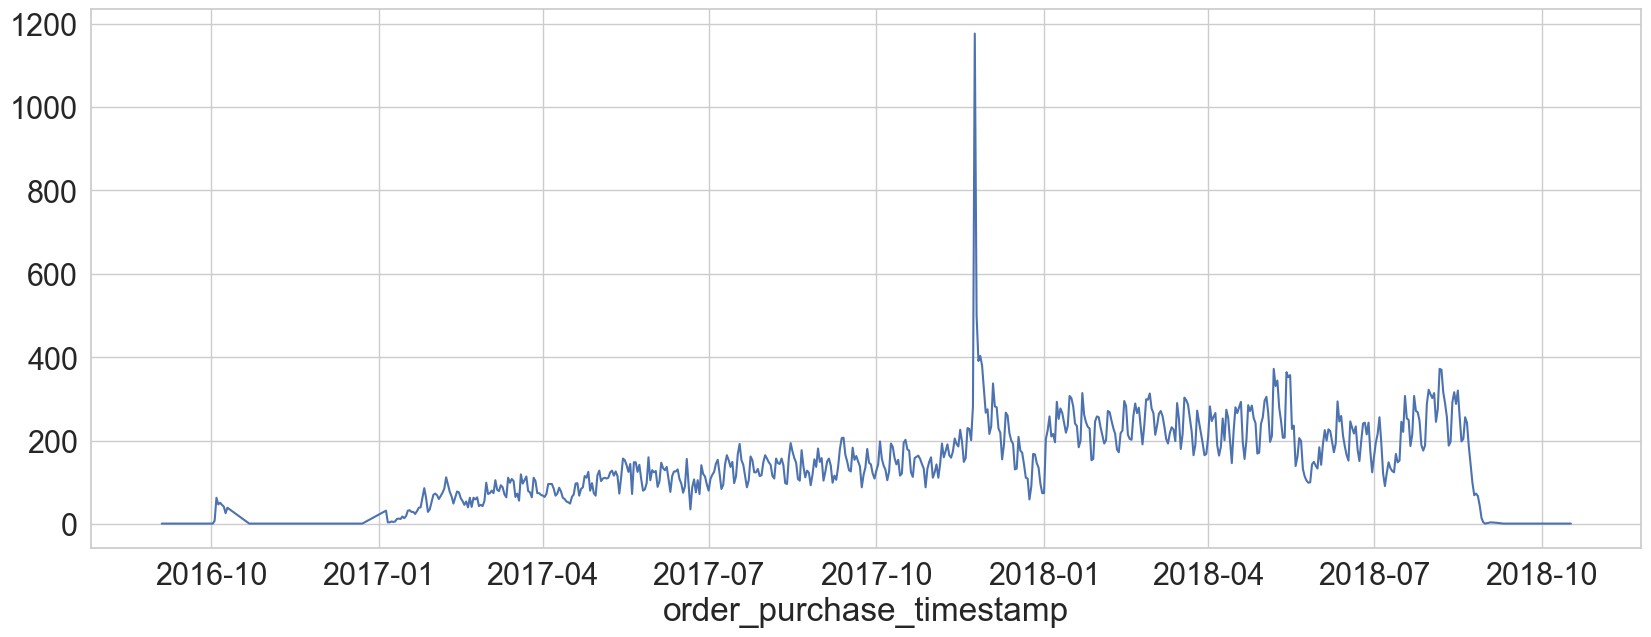

In [24]:
df_for_plots_orders_cnt = df_for_plots.groupby(df_for_plots.order_purchase_timestamp.dt.date).order_id.count()
sns.lineplot(x = df_for_plots_orders_cnt.index, y = df_for_plots_orders_cnt.values)

какая-то аномалия была 24.11.2017

Проверим какие бывают статусы заказов

In [18]:
df_for_plots.groupby('order_status').order_id.count()

order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
Name: order_id, dtype: int64

In [22]:
df_cstms_unq = len(df_customers.groupby('customer_unique_id',as_index = False))
df_cstms_more_than_ones = df_customers.groupby('customer_unique_id',as_index = False)\
                      .agg({'customer_id':'count'})\
                      .sort_values('customer_id', ascending = False)\
                      .query('customer_id > 1')\
                      .customer_id.count()
print(f' Всего покупателей {df_cstms_unq} \n Из них разместили более 1 заказа {df_cstms_more_than_ones}')

 Всего покупателей 96096 
 Из них разместили более 1 заказа 2997


Очень небольшое число покупателей заказы повторно.

In [23]:
df_customers.groupby(['customer_state']).agg({'customer_id' : 'count'}).sort_values('customer_id', ascending = False).head(5)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045


Явно выраженный штат-лидер по числу заказов, а с учетом небольшого числа повторных заказов - и по числу заказчиков.

In [24]:
df_customers.groupby(['customer_state', 'customer_city']).agg({'customer_id' : 'count'}).sort_values('customer_id', ascending = False).head(5)

,,customer_id
customer_state,customer_city,
SP,sao paulo,15540
RJ,rio de janeiro,6882
MG,belo horizonte,2773
DF,brasilia,2131
PR,curitiba,1521


А так же выдающийся город-чемпион

In [25]:
df_items.groupby('seller_id').seller_id.count().sort_values(ascending = False)

seller_id
6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
                                    ... 
3fefda3299e6dfaea3466ef346a3571a       1
b9de031b671cd48b28fae9d828cbf2b4       1
2235cf78d3e2073a88146a9cb60f0dd0       1
b86a47b3366e3b5424a7b225781f4908       1
7d81e74a4755b552267cd5e081563028       1
Name: seller_id, Length: 3095, dtype: int64

Выраженных лидеров поставщиков нет

In [26]:
df_items.sort_values('price', ascending = False).head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31


In [27]:
df_items.sort_values('freight_value', ascending = False).head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
73486,a77e1550db865202c56b19ddc6dc4d53,1,ec31d2a17b299511e7c8627be9337b9b,257e61d3251fb5efb9daadddbc2cf7ca,2018-04-25 06:55:13,979.0,409.68


нет ничего дороже 7000 и тяжелее 410

In [28]:
df_items.groupby('order_id').product_id.count().sort_values(ascending = False)

order_id
8272b63d03f5f79c56e9e4120aec44ef    21
ab14fdcfbe524636d65ee38360e22ce8    20
1b15974a0141d54e36626dca3fdc731a    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
a6e8ad5db31e71f5f12671af561acb4a     1
a6e963c11e80432334e984ead4797a8b     1
a6e9b80a7636eb8dd592dbb3e20d0a91     1
a6e9d106235bcf1dda54253686d89e99     1
00010242fe8c5a6d1ba2dd792cb16214     1
Name: product_id, Length: 98666, dtype: int64

Максимальное число позиций в одном заказе - 21 шт
Но самое странное что в таблице нет колонки количество.
Посмотрим на чемпионский по числу записей заказ

In [29]:
df_items.loc[df_items.order_id == '8272b63d03f5f79c56e9e4120aec44ef'].groupby('product_id').seller_id.count()

product_id
05b515fdc76e888aada3c6d66c201dff    10
270516a3f41dc035aa87d220228f844c    10
79ce45dbc2ea29b22b5a261bbb7b7ee7     1
Name: seller_id, dtype: int64

Оказывается он состоит всего из трех товаров, а проблема отсутствия колонки с количеством решается по принципу - одна строка - 1 шт

Посмотрим сколько же реально товаров входит в заказы

In [30]:
t = df_items.groupby(['order_id','product_id'],as_index = False)\
        .agg({'seller_id':'count'})\
        .sort_values(['order_id', 'product_id','seller_id'], ascending = True)
t.groupby('order_id', as_index = False)\
 .agg({'seller_id':'count'})\
 .sort_values('seller_id', ascending = False)\
 .rename(columns = {'seller_id':'cnt'})\
 .query('cnt > 1')

,order_id,cnt
77909,ca3625898fbd48669d50701aba51cd5f,8
48309,7d8f5bfd5aff648220374a2df62e84d5,7
46116,77df84f9195be22a4e9cb72ca9e8b4c2,7
66653,ad850e69fce9a512ada84086651a2e7d,7
36443,5efc0b7fe9df7f0c567404abaa4d25fc,6
...,...,...
96744,fb085529373f03634a84fa2358deedcd,2
75282,c35c0040e09990a95e79c617fafe8c10,2
31465,518ca81bf7a1b719e32d6847b6afff85,2
92256,ef43d5664bd1ab24fd6b38b5a8ca3cf6,2


В заказ с самым широким ассортиментов вошло всего 8 позиций.
Заказов содержащих болеее 1 товара - 3236 из около 100 000
Проверим себя, посмотрим на самый ассортиментный заказ

In [31]:
df_items.loc[df_items.order_id == 'ca3625898fbd48669d50701aba51cd5f']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
89007,ca3625898fbd48669d50701aba51cd5f,1,1065e0ebef073787a7bf691924c60eeb,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,309.0,1.84
89008,ca3625898fbd48669d50701aba51cd5f,2,0cf2faf9749f53924cea652a09d8e327,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,33.9,1.84
89009,ca3625898fbd48669d50701aba51cd5f,3,0de59eddc63167215c972b0d785ffa7b,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,159.0,3.67
89010,ca3625898fbd48669d50701aba51cd5f,4,0de59eddc63167215c972b0d785ffa7b,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,159.0,3.67
89011,ca3625898fbd48669d50701aba51cd5f,5,5dae498eff2d80057f56122235a36aff,888faa8bfb0b159c37de6d898b961c31,2018-08-17 02:25:07,95.9,0.15
89012,ca3625898fbd48669d50701aba51cd5f,6,4a5c3967bfd3629fe07ef4d0cc8c3818,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,109.9,0.15
89013,ca3625898fbd48669d50701aba51cd5f,7,678c229b41c0e497d35a25a8be1cc631,888faa8bfb0b159c37de6d898b961c31,2018-08-17 02:25:07,95.9,0.15
89014,ca3625898fbd48669d50701aba51cd5f,8,21b524c4c060169fa75ccf08c7da4627,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,63.7,0.15
89015,ca3625898fbd48669d50701aba51cd5f,9,309dd69eb83cea38c51709d62befe1a4,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,56.0,3.68
89016,ca3625898fbd48669d50701aba51cd5f,10,309dd69eb83cea38c51709d62befe1a4,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,56.0,3.68


Похоже, все так и есть. 

Получается, что таблица items содержит построчную раскладку каждого заказа из orders.

А значит мы можем через группировки посчитать сумму по каждому заказу и суммарный вес заказа
Сначала посчитаем суммы для одинаковых товаров в одинаковых заказах

In [32]:
df_sum_and_wght = df_items.groupby(['order_id','product_id'],as_index = False)[['price','freight_value']]\
        .sum()\
        .sort_values('price', ascending = True)
df_sum_and_wght

,order_id,product_id,price,freight_value
79096,c5bdd8ef3c0ec420232e668302179113,8a3254bee785a526d548a81a9bc3c9be,0.85,22.30
44154,6e864b3f0ec71031117ad4cf46b7f2a1,8a3254bee785a526d548a81a9bc3c9be,0.85,18.23
25085,3ee6513ae7ea23bdfab5b9ab60bffcb5,8a3254bee785a526d548a81a9bc3c9be,0.85,18.23
96770,f1d5c2e6867fa93ceee9ef9b34a53cbf,46fce52cef5caa7cc225a5531c946c8b,2.20,7.39
93193,e8bbc1d69fee39eee4c72cb5c969e39d,310dc32058903b6416c71faff132df9e,2.29,7.78
...,...,...,...,...
98056,f5136e38d1a14a4dbd87dff67da82701,1bdf5e6731585cf01aa8169c7028d6ad,6499.00,227.66
102041,fefacc66af859508bf1a7934eab1e97f,69c590f7ffc7bf8db97190b6cb6ed62e,6729.00,193.21
3243,0812eb902a67711a1cb742b3cdaa65ae,489ae2aa008f021502940f251d4cce7f,6735.00,194.31
46140,736e1922ae60d0d6a89247b851902527,19936fa4f614ee0590d3b77ac83fd648,7160.00,114.88


А теперь посчитаем суммы стоимости и веса для всех товаров в одинаковых заказах

In [33]:
df_sum_and_wght = df_sum_and_wght.groupby('order_id', as_index = False)[['price','freight_value']]\
 .sum()\
 .sort_values('price', ascending = True)
df_sum_and_wght

,order_id,price,freight_value
42562,6e864b3f0ec71031117ad4cf46b7f2a1,0.85,18.23
24174,3ee6513ae7ea23bdfab5b9ab60bffcb5,0.85,18.23
93208,f1d5c2e6867fa93ceee9ef9b34a53cbf,2.20,7.39
89758,e8bbc1d69fee39eee4c72cb5c969e39d,2.29,7.78
21805,38bcb524e1c38c2c1b60600a80fc8999,2.90,8.72
...,...,...,...
94439,f5136e38d1a14a4dbd87dff67da82701,6499.00,227.66
98298,fefacc66af859508bf1a7934eab1e97f,6729.00,193.21
3130,0812eb902a67711a1cb742b3cdaa65ae,6735.00,194.31
44467,736e1922ae60d0d6a89247b851902527,7160.00,114.88


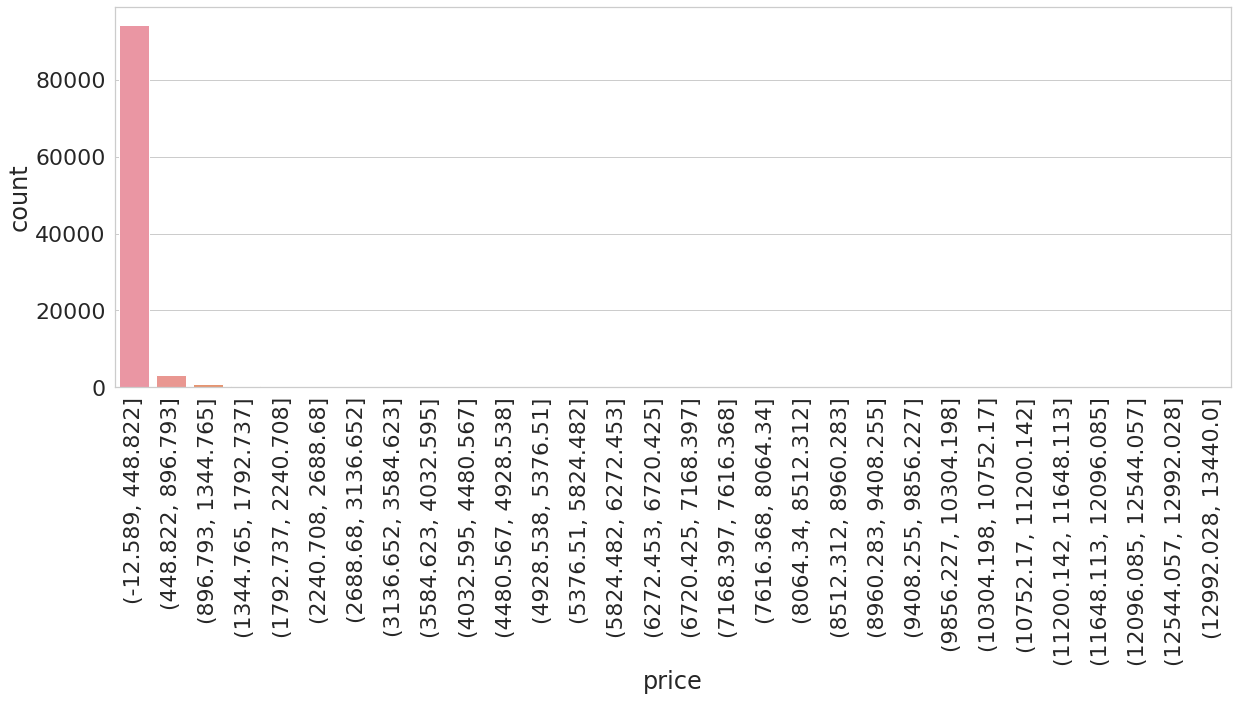

In [37]:
ax = sns.countplot(data=df_sum_and_wght, x=pd.cut(df_sum_and_wght.price, 30))
ax.tick_params(axis='x', labelrotation=90)

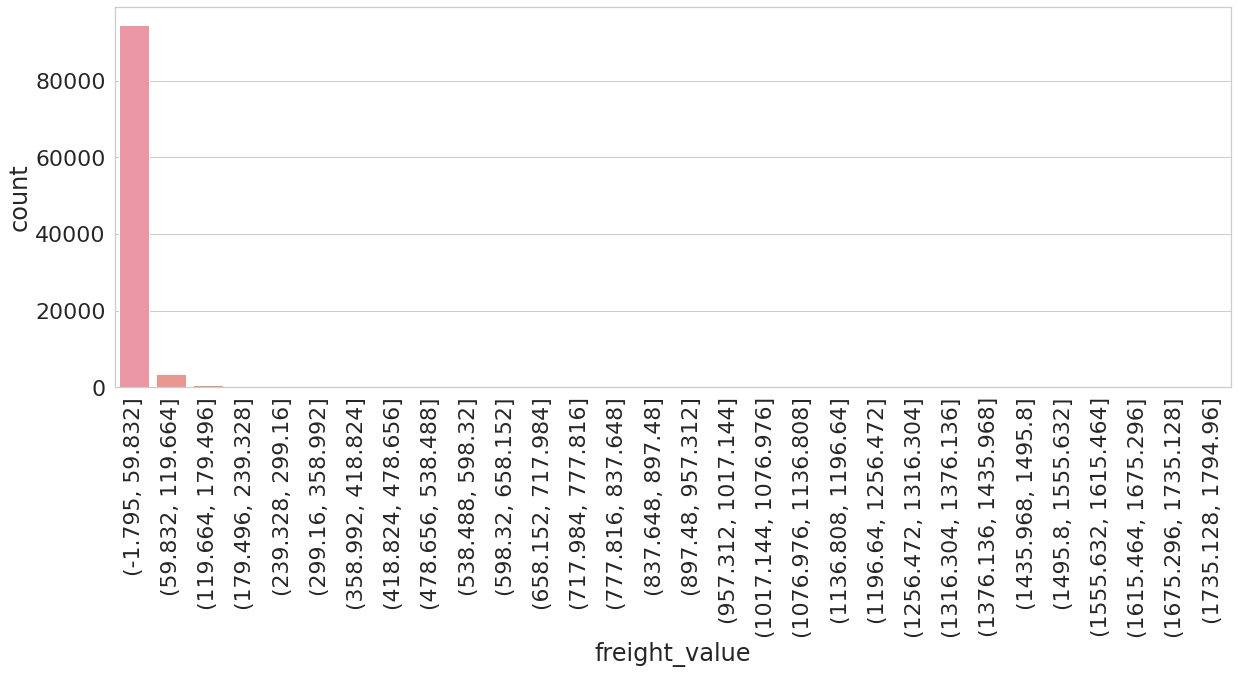

In [38]:
bx = sns.countplot(data=df_sum_and_wght, x=pd.cut(df_sum_and_wght.freight_value, 30))
bx.tick_params(axis='x', labelrotation=90)

Как видим, у нас преобладают легкие и недорогие заказы. При этом графики настолько похожи, что кажется, что цена товара зависит от его веса.

***
<a id="1"></a>
#  Сколько у нас пользователей, которые совершили покупку только один раз?

Пользователь - это заказчик, он же customer. Заказчик определается по customer_unique_id. У одного заказчик customer_unique_id может быть несколько заказов customer_id или order_id

Схлопнем таблицы заказов и заказчиков в одну по customer_id (почему это можно сделать см **[тут](#merge)**)

Таким образом мы получим в одной таблице и уникальных заказчиков, и заказы и даты и статусы

In [39]:
df_co = df_customers.merge(df_orders, on='customer_id', how='left')
df_co 

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05


Отберем заказчиков, разместивших только 1 заказ

In [40]:
df_1 = df_co.groupby('customer_unique_id', as_index = False)\
     .agg({'customer_zip_code_prefix' : 'count'})\
     .rename(columns = {'customer_zip_code_prefix' : 'orders_cnt'})\
     .sort_values('orders_cnt', ascending = False)\
     .query('orders_cnt == 1').customer_unique_id.to_list()
df_the_only_one = df_co.loc[df_co.customer_unique_id.isin(df_1)]
df_the_only_one

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05


Посмотрим на распределение статусов заказов

In [41]:
df_the_only_one.groupby('order_status').agg({'order_purchase_timestamp' : 'count'})

,order_purchase_timestamp
order_status,
approved,2
canceled,533
created,4
delivered,90379
invoiced,298
processing,286
shipped,1032
unavailable,565


 Осталось отобрать из размещенных заказов покупки
 
 Нас интересуют статусы 
- "delivered" - товар получен заказчиком
- "unavailable" - недоступный товар вряд ли можно считать покупкой
- "canceled" -  это не покупка, надо проверить

Плюс поля

- order_approved_at - время подтверждения ОПЛАТЫ заказа. Если время есть, значит заказ оплачен
- order_delivered_customer_date - время передачи заказа заказчику. Если время есть, значит заказ получен

Смотрим "delivered" и order_delivered_customer_date

In [42]:
df_the_only_one.loc[df_the_only_one.order_status == 'delivered']\
    .order_delivered_customer_date\
    .isnull()\
    .sum()


8

только для 8 заказов со статусом "delivered" оказалось не заполнено время получения заказа заказчиком

In [43]:
df_the_only_one.loc[df_the_only_one.order_status == 'delivered']\
    .order_delivered_customer_date\
    .sort_values()\
    .tail(10)

65131   2018-10-11 16:41:14
5128    2018-10-17 13:22:46
9034                    NaT
12030                   NaT
13357                   NaT
51668                   NaT
85377                   NaT
87172                   NaT
89194                   NaT
97677                   NaT
Name: order_delivered_customer_date, dtype: datetime64[ns]

Других значенний в поле времнеи доставки кроме времени и NAN нет, ни пробелов, ни нулей, ничего такого. То есть, все что не NaN - даты
Посмотрим на эти заказы с NaN в order_delivered_customer_date

In [44]:
df_the_only_one.loc[df_the_only_one.order_status == 'delivered']\
    .loc[df_the_only_one.order_delivered_customer_date.isnull() == True]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
9034,5e89028e024b381dc84a13a3570decb4,2f17c5b324ad603491521b279a9ff4de,18255,quadra,SP,f5dd62b788049ad9fc0526e3ad11a097,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
12030,28c37425f1127d887d7337f284080a0f,175378436e2978be55b8f4316bce4811,9431,ribeirao pires,SP,20edc82cf5400ce95e1afacc25798b31,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19
13357,29f0540231702fda0cfdee0a310f11aa,1bd06a0c0df8b23dacfd3725d2dc0bb9,12445,pindamonhangaba,SP,2ebdfc4f15f23b91474edf87475f108e,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
51668,ec05a6d8558c6455f0cbbd8a420ad34f,13467e882eb3a701826435ee4424f2bd,18520,cerquilho,SP,2d1e2d5bf4dc7227b3bfebb81328c15f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
85377,dd1b84a7286eb4524d52af4256c0ba24,cce5e8188bf42ffb3bb5b18ff58f5965,7261,guarulhos,SP,ab7c89dc1bf4a1ead9d6ec1ec8968a84,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
87172,cfda40ca8dd0a5d486a9635b611b398a,3bc508d482a402715be4d5cf4020cc81,13170,sumare,SP,e69f75a717d64fc5ecdfae42b2e8e086,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
89194,4f1d63d35fb7c8999853b2699f5c7649,ebf7e0d43a78c81991a4c59c145c75db,13560,sao carlos,SP,0d3268bad9b086af767785e3f0fc0133,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
97677,e08caf668d499a6d643dafd7c5cc498a,d77cf4be2654aa70ef150f8bfec076a6,91330,porto alegre,RS,2d858f451373b04fb5c984a1cc2defaf,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23


Как видим все эти 8 заказов оплачены и по статусу - доставлены.

**Поэтому дальше будем считать, что эти заказы доставлены не смотря на отсутствующую дату доставки**

In [45]:
df_the_only_one.loc[df_the_only_one.order_delivered_customer_date.isnull() == False]\
    .order_status\
    .isnull()\
    .sum()

0

По заказам с заполненными датами получения заказа клиентом нет пропусков в заполнении статусов заказа.
Проверим какими статусами они заполнены.

In [46]:
len(df_the_only_one.loc[df_the_only_one.order_delivered_customer_date.isnull() == False].order_status) == \
len(df_the_only_one.loc[df_the_only_one.order_delivered_customer_date.isnull() == False].loc[df_the_only_one.order_status == 'delivered'].order_status)


False

В строках с заполненной датой получения не все статусы "delivered"
Проверим что за отличные от "delivered" статусы еще встречаются

In [47]:
df_the_only_one.loc[df_the_only_one.order_delivered_customer_date.isnull() == False].loc[df_the_only_one.order_status != 'delivered'].order_status

27088    canceled
50569    canceled
57499    canceled
59705    canceled
76291    canceled
77039    canceled
Name: order_status, dtype: object

Видим, что для 6 заказов указана дата получения заказчиком, но при этом стоит статус заказа canceled
Проверим только ли эти два статуса встречаются

In [48]:
len(df_the_only_one.loc[df_the_only_one.order_delivered_customer_date.isnull() == False].order_status) == \
len(df_the_only_one.loc[df_the_only_one.order_delivered_customer_date.isnull() == False].loc[df_the_only_one.order_status == 'delivered'].order_status)\
+ len(df_the_only_one.loc[df_the_only_one.order_delivered_customer_date.isnull() == False].loc[df_the_only_one.order_status == 'canceled'].order_status)

True

Да, других статусов кроме delivered и canceled у заказов с заполненной датой доставки нет. Посмотрим на заказы canceled

In [49]:
df_the_only_one.loc[df_the_only_one.order_delivered_customer_date.isnull() == False].loc[df_the_only_one.order_status == 'canceled']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
27088,6c57e6119369185e575b36712766b0ef,59a7bb642795ddc85534fbd5f7360334,20091,rio de janeiro,RJ,770d331c84e5b214bd9dc70a10b829d0,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29
50569,1bccb206de9f0f25adc6871a1bcf77b2,6a04c8339c44b23e189446216a494569,32071,contagem,MG,1950d777989f6a877539f53795b4c3c3,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09
57499,bf609b5741f71697f65ce3852c5d2623,f9af3bfab584769f34c314b222d34263,20091,rio de janeiro,RJ,8beb59392e21af5eb9547ae1a9938d06,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30
59705,70fc57eeae292675927697fe03ad3ff5,b8b8726af116a5cfb35b0315ecef9172,22770,rio de janeiro,RJ,65d1e226dfaeb8cdc42f665422522d14,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25
76291,de4caa97afa80c8eeac2ff4c8da5b72e,d93a22bb52bb2f41a7267b8a02370781,88058,florianopolis,SC,2c45c33d2f9cb8ff8b1c86cc28c11c30,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08
77039,5cdec0bb8cbdf53ffc8fdc212cd247c6,2f96790fba243100730c8d1185dd2f25,5846,sao paulo,SP,dabf2b0e35b423f94618bf965fcb7514,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30


Как мы видим, **у этих заказов указана дата доставки заказчику**, то есть они были доставлены, **по ним была получена оплата**, но **согласно статусу они были отменены**

Посмотрим на дату и время движений этих заказов

In [50]:
delivered_but_canceled = df_the_only_one.loc[df_the_only_one.order_delivered_customer_date.isnull() == False].loc[df_the_only_one.order_status == 'canceled'].order_id.to_list()
delivered_but_canceled

['770d331c84e5b214bd9dc70a10b829d0',
 '1950d777989f6a877539f53795b4c3c3',
 '8beb59392e21af5eb9547ae1a9938d06',
 '65d1e226dfaeb8cdc42f665422522d14',
 '2c45c33d2f9cb8ff8b1c86cc28c11c30',
 'dabf2b0e35b423f94618bf965fcb7514']

In [51]:
df_items.loc[df_items.order_id.isin(delivered_but_canceled)].merge(df_orders, on = 'order_id')


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,1950d777989f6a877539f53795b4c3c3,1,e435ceb7ced9b8446defd858630454ed,2a61c271b1ac763450d846849783e922,2018-02-23 20:56:05,29.99,14.10,1bccb206de9f0f25adc6871a1bcf77b2,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09
1,2c45c33d2f9cb8ff8b1c86cc28c11c30,1,e24f73b7631ee3fbb2ab700a9acaa258,0cbcee27c791afa0cdcb08587a2013a8,2016-10-14 10:40:50,135.00,18.51,de4caa97afa80c8eeac2ff4c8da5b72e,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08
2,65d1e226dfaeb8cdc42f665422522d14,1,9c7bdf67b06b419aefb93cfdfc96c55d,ed49da7cadefc454d6a67de249eab240,2016-10-21 16:24:43,21.50,14.11,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25
3,770d331c84e5b214bd9dc70a10b829d0,1,eba7488e1c67729f045ab43fac426f2e,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-11 15:07:11,249.90,14.03,6c57e6119369185e575b36712766b0ef,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29
4,8beb59392e21af5eb9547ae1a9938d06,1,c66def7098f4d87751f40c3a4855ced1,46dc3b2cc0980fb8ec44634e21d2718e,2016-10-13 14:34:31,99.99,11.23,bf609b5741f71697f65ce3852c5d2623,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30
5,dabf2b0e35b423f94618bf965fcb7514,1,473795a355d29305c3ea6b156833adf5,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-13 13:36:59,59.90,0.48,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30
6,dabf2b0e35b423f94618bf965fcb7514,2,7cd29da0653abeb444703cc5a957f479,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-13 13:36:59,49.90,29.94,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30


Не видно какой-то закономерности кроме:
1. Неединичное совпадение до секунды shipping_limit_date и order_delivered_carrier_date  - явные проблемы с внесением данных в этих колонках
2. Неединичное превышение order_delivered_carrier_date над shipping_limit_date, чего вроде как быть не может согласно описанию shipping_limit_date - **максимальная дата доставки** продавцом для передачи заказа партнеру по логистике

С учетом сказанного буду считать, что **в данных 6 случаях статус canceled поставлен ошибочно из этих 6 canceled - были доставлены и покупка состоялась**

а значит **статус заказа delivered с плюсовой поправкой на эти 6 заказов определяет получен ли заказ клиентом**

### Что есть покупка?

Строго говоря, **доставленный (принятый и не отмененный) заказчиком заказ - и есть покупка**. 

Оплата юридически не связана с покупкой товара. Перечисление денег и получение товара лишь накладывает соотвествующие обязательства на стороны.

Из данных невозможно понять о юридических или физических лицах идет речь. Применительно к юрлицам порядок оплаты и получения товара определяется договором с каждым конкретным юрлицом. 

Кроме того, право перехода собственности, как правило, возникает в момент подписания накладной, оплата же лишь погашает обязательство заказчика по оплате произведенной покупки.

Тем не менее, введу три варианта:

1. Заказ получен
2. Заказ оплачен
3. Заказ получен и оплачен - да, да, у нас там есть несколько полученных заказазов, по которым не проставлена дата подтверждения

И пусть он сам выбирает нужную схему расчета сообразно своему миропониманию.

**Считаем заказчиков при принципу "заказ получен"** = delivery + 6

In [52]:
# Всего одноразовых клиентов
a = df_customers.customer_unique_id.nunique()
# Одноразовых клиентов с одним доставленным заказом
cnt1 = len(df_the_only_one.loc[df_the_only_one.order_status == 'delivered']) + 6

print(f' Если считать покупку по статусу delivery, то заказчиков, совершивших одну покупку {cnt1}')

 Если считать покупку по статусу delivery, то заказчиков, совершивших одну покупку 90385


**Считаем заказчиков при принципу "заказ оплачен"**

Признаком оплаты является корректно заполненное поле order_approved_at 

In [53]:
df_the_only_one.loc[df_the_only_one.order_approved_at.isnull() != True]\
         .groupby('order_status')\
         .order_purchase_timestamp\
         .count()

order_status
approved           2
canceled         454
delivered      90366
invoiced         298
processing       286
shipped         1032
unavailable      565
Name: order_purchase_timestamp, dtype: int64

Очевидно, что определение покупки через оплату лишено смысла в случае статусов canceled и unavailable, поскольку эти статусы все  видимо поставлены не просто так

Все остальнные статусы как-будто говорят о том, что заказ оплачен, находится или находился в работе, нет отснований считать его отмененным. 

Так что **число оплаченных заказов будем корректировать на отмененные и недоступные заказы**

In [54]:
df_orders.query("order_status == 'canceled' and order_delivered_customer_date.notnull()")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
2921,1950d777989f6a877539f53795b4c3c3,1bccb206de9f0f25adc6871a1bcf77b2,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09
8791,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30
58266,770d331c84e5b214bd9dc70a10b829d0,6c57e6119369185e575b36712766b0ef,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29
59332,8beb59392e21af5eb9547ae1a9938d06,bf609b5741f71697f65ce3852c5d2623,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25
94399,2c45c33d2f9cb8ff8b1c86cc28c11c30,de4caa97afa80c8eeac2ff4c8da5b72e,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08


**Все оплаченные заказы со статусом canceled (кроме все тех же 6) не были доставлены заказчику** - нет данных в поле order_delivered_customer_date, а значит все они (кроме 6) были отменены

посмотрим статус unavailable

In [55]:
df_orders.query("order_status == 'unavailable' and order_delivered_customer_date.notnull()")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


**Все оплаченные заказы со статусом unavailable не были доставлены заказчику** - нет данных в поле order_delivered_customer_date, а значит все они были отменены

In [56]:
# Всего одноразовых клиентов
a = df_customers.customer_unique_id.nunique()
# Одноразовых клиентов с одним оплаченным заказом
cnt2 = len(df_the_only_one.loc[df_the_only_one.order_approved_at.isnull() != True]\
            .loc[df_the_only_one.order_status != 'canceled']\
            .loc[df_the_only_one.order_status != 'unavailable']) + 6

print(f' Если считать покупку по статусу "заказ оплачен", то заказчиков, совершивших одну покупку {cnt2} ')

 Если считать покупку по статусу "заказ оплачен", то заказчиков, совершивших одну покупку 91990 


**Считаем заказчиков при принципу "заказ оплачен и доставлен"**

In [57]:
# Всего одноразовых клиентов
a = df_customers.customer_unique_id.nunique()
# Одноразовых клиентов с одним оплаченным заказом
cnt3 = len(df_the_only_one.loc[df_the_only_one.order_approved_at.isnull() != True]\
            .loc[df_the_only_one.order_status != 'canceled']\
            .loc[df_the_only_one.order_status != 'unavailable']\
            .loc[df_the_only_one.order_status == 'delivered']) + 6

print(f' Если считать покупку по статусу "заказ оплачен и доставлен", то заказчиков, совершивших одну покупку {cnt3} ')

 Если считать покупку по статусу "заказ оплачен и доставлен", то заказчиков, совершивших одну покупку 90372 


In [58]:
df_the_only_one.loc[df_the_only_one.order_approved_at.isnull() == True]\
            .loc[df_the_only_one.order_status == 'delivered']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
8970,0bf35cac6cc7327065da879e2d90fae8,c4c0011e639bdbcf26059ddc38bd3c18,13225,varzea paulista,SP,d77031d6a3c8a52f019764e68f211c69,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
13890,1e101e0daffaddce8159d25a8e53f2b2,c8822fce1d0bfa7ddf0da24fff947172,27945,macae,RJ,12a95a3c06dbaec84bcfb0e2da5d228a,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
20863,d5de688c321096d15508faae67a27051,d49f3dae6bad25d05160fc17aca5942d,36400,conselheiro lafaiete,MG,7002a78c79c519ac54022d4f8a65e6e8,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
22703,07a2a7e0f63fd8cb757ed77d4245623c,79af1bbf230a2630487975aa5d7d6220,37660,paraisopolis,MG,51eb2eebd5d76a24625b31c33dd41449,delivered,2017-02-18 15:52:27,NaT,2017-02-23 03:09:14,2017-03-07 13:57:47,2017-03-29
39286,d85919cb3c0529589c6fa617f5f43281,c094ac95fcd52f821809ec232a7a6956,95795,sao vendelino,RS,3c0b8706b065f9919d0505d3b3343881,delivered,2017-02-17 15:53:27,NaT,2017-02-22 11:31:30,2017-03-03 11:47:47,2017-03-23
41493,74bebaf46603f9340e3b50c6b086f992,f79be7c08dd24b72d34634f1b89333a4,65110,sao jose de ribamar,MA,2babbb4b15e6d2dfe95e2de765c97bce,delivered,2017-02-18 17:15:03,NaT,2017-02-22 11:23:11,2017-03-03 18:43:43,2017-03-31
44050,684cb238dc5b5d6366244e0e0776b450,6ff8b0d7b35d5c945633b8d60165691b,11030,santos,SP,c1d4211b3dae76144deccd6c74144a88,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
52849,a3d3c38e58b9d2dfb9207cab690b6310,5a4fa4919cbf2b049e72be460a380e5b,35620,abaete,MG,2eecb0d85f281280f79fa00f9cec1a95,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20
60039,2127dc6603ac33544953ef05ec155771,8a9a08c7ca8900a200d83cf838a07e0b,6708,cotia,SP,e04abd8149ef81b95221e88f6ed9ab6a,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
61049,f67cd1a215aae2a1074638bbd35a223a,bc1896dc77f49e6dec880445a9b443a3,21020,rio de janeiro,RJ,88083e8f64d95b932164187484d90212,delivered,2017-02-18 22:49:19,NaT,2017-02-22 11:31:06,2017-03-02 12:06:06,2017-03-21


**как мы видим у нас есть доставленные заказы без указания информации об оплате**

In [59]:
len(df_the_only_one.loc[df_the_only_one.order_approved_at.isnull() == True]\
            .loc[df_the_only_one.order_status == 'delivered'])

13

И таковых - 13 штук

## Подведем итоги по первому вопросу:

In [60]:
print(f' Cколько пользователей совершили покупку только один раз?\n \
\n \
Ответ:\n \
\n \
Если считать покупку по факту получения заказа клиентом: {cnt1}\n \
Если считать покупку по факту оплаты заказа клиентом: {cnt2}\n \
Если считать покупку по факту получения клиентом оплаченного заказа: {cnt3}')

 Cколько пользователей совершили покупку только один раз?
 
 Ответ:
 
 Если считать покупку по факту получения заказа клиентом: 90385
 Если считать покупку по факту оплаты заказа клиентом: 91990
 Если считать покупку по факту получения клиентом оплаченного заказа: 90372


<a id="2"></a>
# Вопрос №2 "Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)"

In [61]:
df_month_failed = df_orders.loc[df_orders.order_status != 'delivered']
df_month_failed

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [62]:
df_month_failed['invoiced']=df_orders.order_status.loc[df_orders.order_status == 'invoiced']
df_month_failed['shipped']=df_orders.order_status.loc[df_orders.order_status == 'shipped']
df_month_failed['processing']=df_orders.order_status.loc[df_orders.order_status == 'processing']
df_month_failed['canceled']=df_orders.order_status.loc[df_orders.order_status == 'canceled']
df_month_failed['unavailable']=df_orders.order_status.loc[df_orders.order_status == 'unavailable']
df_month_failed

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,invoiced,shipped,processing,canceled,unavailable
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,invoiced,NaN,NaN,NaN,NaN
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,NaN,shipped,NaN,NaN,NaN
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,invoiced,NaN,NaN,NaN,NaN
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,NaN,NaN,processing,NaN,NaN
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,NaN,shipped,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01,NaN,NaN,NaN,canceled,NaN
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06,NaN,NaN,processing,NaN,NaN
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27,NaN,NaN,NaN,canceled,NaN
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15,NaN,NaN,NaN,NaN,unavailable


In [63]:
df_orders.order_purchase_timestamp.sort_values()

4541    2016-09-04 21:15:19
4396    2016-09-05 00:15:34
10071   2016-09-13 15:24:19
30710   2016-09-15 12:16:38
83078   2016-10-02 22:07:52
                ...        
50387   2018-09-29 09:13:03
88500   2018-10-01 15:30:09
31891   2018-10-03 18:55:29
68373   2018-10-16 20:16:02
60938   2018-10-17 17:30:18
Name: order_purchase_timestamp, Length: 99441, dtype: datetime64[ns]

In [64]:
df_month_failed.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
invoiced                                 object
shipped                                  object
processing                               object
canceled                                 object
unavailable                              object
dtype: object

In [65]:
df_failed_status = df_month_failed.set_index('order_purchase_timestamp')\
               .resample("M")\
               .agg({'customer_id':'count',
                     'invoiced':'count',
                     'shipped':'count',
                     'processing':'count',
                     'canceled':'count',
                     'unavailable':'count'})\
                .rename(columns = {'customer_id':'total_undelivered'})
df_failed_status

,total_undelivered,invoiced,shipped,processing,canceled,unavailable
order_purchase_timestamp,,,,,,
2016-09-30,3,0,1,0,2,0
2016-10-31,59,18,8,2,24,7
2016-11-30,0,0,0,0,0,0
2016-12-31,0,0,0,0,0,0
2017-01-31,50,12,16,9,3,10
2017-02-28,127,11,21,32,17,45
2017-03-31,136,3,45,23,33,32
2017-04-30,101,14,49,10,18,9
2017-05-31,154,16,55,23,29,31


**Посмотрим на статус invoiced**

In [66]:
df_orders.loc[df_orders.order_status == 'invoiced']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
455,38b7efdf33dd5561f4f5d4f6e07b0414,021e84751ba0ead75b6d314a6ead88d9,invoiced,2017-08-01 18:17:41,2017-08-01 18:32:30,NaT,NaT,2017-08-28
1833,51b0dccc8596ce37a930dff2d63a10a2,31bf1057b00f14804278590bbac18b1b,invoiced,2017-05-05 22:34:48,2017-05-05 22:45:12,NaT,NaT,2017-06-06
2116,5504eaa5a86eb25fa666cf2e6b96c701,a30be38e1ed0ffb39b318bf1d15e98d9,invoiced,2017-11-29 08:33:06,2017-11-29 08:56:23,NaT,NaT,2017-12-20
...,...,...,...,...,...,...,...,...
98414,41ad2ae32ee66c07ef3b0301ba02ad27,5c7f8d14a0a12198d1d07167d7d343b3,invoiced,2017-11-24 15:54:47,2017-11-24 19:33:24,NaT,NaT,2017-12-18
98624,9ffb325177b96c422447e3b9ee9a6270,e4079117ea0dc8bc27274e34c4796515,invoiced,2018-05-10 19:11:18,2018-05-10 19:37:27,NaT,NaT,2018-06-05
98845,021dac6e3120485db6a77474aa21b979,c40f7f00e91eb8a0da1e58484380a796,invoiced,2017-11-24 22:46:09,2017-11-25 01:53:42,NaT,NaT,2017-12-15
99031,c526fe83c01c48066394ff5d81f9ab9a,6c678c38f3a0874b7bfeeb2d5fb22876,invoiced,2018-08-07 11:11:30,2018-08-07 11:25:01,NaT,NaT,2018-08-17


In [67]:
df_orders.loc[df_orders.order_status == 'invoiced']\
         .loc[df_orders.order_approved_at.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [68]:
df_orders.loc[df_orders.order_status == 'invoiced']\
         .loc[df_orders.order_estimated_delivery_date.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


**Статус invoiced проставляется после получения оплаты по счету**. У нас нет счетов со статусом invoiced, по которым бы не было оплаты.

**Посмотрим на статус processing**

In [69]:
df_orders.loc[df_orders.order_status == 'processing']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
741,6a6c7d523fd59eb5bbefc007331af717,d954782ec6c0e911292c8a80757ef28d,processing,2017-11-24 20:09:33,2017-11-24 23:15:15,NaT,NaT,2017-12-20
1192,745e1d4a7f8c4b548881788d4113bb1d,7198d7088442e4ddfe553353d8ddc957,processing,2017-11-17 06:34:36,2017-11-18 02:15:40,NaT,NaT,2017-12-12
1516,1d52ba7197c7acebbb4f826f6585536f,c9c7fe860d602373a9e93f8bfe9d877a,processing,2017-02-13 18:32:55,2017-02-13 18:43:55,NaT,NaT,2017-04-04
...,...,...,...,...,...,...,...,...
97400,dcdfc540e42725663242bb884c28f0a6,38972104038aa68fcc61277dbf6e7ca9,processing,2017-10-30 10:46:44,2017-10-30 11:09:55,NaT,NaT,2017-11-23
97666,e471815e7114cdb474064f7dbb1a8b67,092c9316ae71b2fe43e526043f351967,processing,2017-12-20 11:00:02,2017-12-20 11:10:43,NaT,NaT,2018-02-02
98089,10951d02d64917a34959abeb8130601e,3e6754e591ff3568ccc5bf69a649918c,processing,2018-02-13 21:02:02,2018-02-15 04:11:21,NaT,NaT,2018-03-13
99140,aea0db338150b526dde24f6fd953a5ed,379a02efdc6a56bd27f99b95fc2f6c06,processing,2017-12-26 21:56:13,2017-12-26 22:05:26,NaT,NaT,2018-01-26


**вообще не понятно чем от отличается от invoiced**

**Посмотрим на статус shipped**

In [70]:
df_orders.loc[df_orders.order_status == 'shipped']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaT,2017-06-08
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaT,2017-12-13
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaT,2018-08-03
...,...,...,...,...,...,...,...,...
98534,a59ef0abffbef8ddaae23600b6ee6604,49e64271fb8eeb19851dc7e850e92204,shipped,2017-11-06 17:35:49,2017-11-07 06:31:44,2017-11-07 18:57:39,NaT,2017-11-24
98779,dab8a6c6bd6ec448df5b3a6b6cb887bc,394653a10cab83cad40d7e2713f3ab89,shipped,2018-07-14 10:12:51,2018-07-16 12:30:58,2018-07-16 14:34:00,NaT,2018-08-03
98932,492aed3c33bac22a8e04138319829283,58466c1166c377a56f6b2ae0d93ffbc0,shipped,2018-07-06 16:26:47,2018-07-06 16:35:10,2018-07-10 12:27:00,NaT,2018-07-26
99113,274a7f7e4f1c17b7434a830e9b8759b1,670af30ca5b8c20878fecdafa5ee01b9,shipped,2018-06-23 13:25:15,2018-06-23 13:40:11,2018-07-04 13:51:00,NaT,2018-07-24


In [71]:
df_orders.loc[df_orders.order_status == 'shipped']\
         .loc[df_orders.order_delivered_carrier_date.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


**Статус shipped проставляется после передачи заказа в службу доставки**. У нас нет счетов со статусом shipped, по которым бы не была бы проставлена дата передачи.

**Посмотрим на статус canceled**

In [72]:
df_orders.loc[df_orders.order_status == 'canceled']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
...,...,...,...,...,...,...,...,...
98791,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaT,NaT,2017-03-30
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99143,6560fb10610771449cb0463c5ba12199,0d07d0a588caf93cc66b7a8aff86d2fe,canceled,2017-10-01 22:26:25,2017-10-01 22:35:22,NaT,NaT,2017-10-27
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


Статус canceled проставляется на всех этапах вне зависимости от оплаты и передачи в доставку. Можно предположить, что **заказы с таким статусом отменяются по просьбе заказчика**

**Посмотрим на статус unavailable**

In [73]:
df_orders.loc[df_orders.order_status == 'unavailable']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05
737,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaT,NaT,2018-02-06
1160,2f634e2cebf8c0283e7ef0989f77d217,7353b0fb8e8d9675e3a704c60ca44ebe,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaT,NaT,2017-10-27
...,...,...,...,...,...,...,...,...
99147,6cf5c427fb11bc5fe8abefa86aa7ba0b,91ac14a1e50bc022eeecf0c2ba37006a,unavailable,2017-10-17 10:53:48,2017-10-19 03:12:43,NaT,NaT,2017-10-27
99233,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23 18:48:09,2017-12-23 18:54:22,NaT,NaT,2018-01-19
99252,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaT,NaT,2018-02-06
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [74]:
df_orders.loc[df_orders.order_status == 'unavailable']\
         .loc[df_orders.order_approved_at.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


**Статус unavailable проставляется только на оплаченные заказы.**

In [75]:
unvlbld_orders = df_orders.loc[df_orders.order_status == 'unavailable'].order_id.to_list()
len(unvlbld_orders)

609

In [76]:
df_f = df_items.loc[df_items.order_id.isin(unvlbld_orders)].merge(df_orders, on = 'order_id')
f_list = df_f.order_id.to_list()
df_f

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,1a47da1d66c70489c8e35fe2b5433ab7,1,eba7488e1c67729f045ab43fac426f2e,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-11 18:53:48,249.90,20.85,3d8e326c3cef3a9bba7ca121baac5fc3,unavailable,2016-10-07 18:16:31,2016-10-07 18:53:48,NaT,NaT,2016-12-07
1,2fd1c83dd4714cf3cf796fffb6c8de62,1,17c7ec33a1657924ad493e6978b4bf91,3d01d1c414c44b5943a09619ff3853cb,2016-10-10 15:55:42,99.00,9.12,7f51c513004ef3f35e834c142f286778,unavailable,2016-10-05 17:21:29,2016-10-06 15:55:40,NaT,NaT,2016-11-29
2,2fd1c83dd4714cf3cf796fffb6c8de62,2,966a067b38634929844120e39b1576bc,61f159ef6da2d441951d2c0efa719362,2016-10-10 15:55:41,59.99,24.08,7f51c513004ef3f35e834c142f286778,unavailable,2016-10-05 17:21:29,2016-10-06 15:55:40,NaT,NaT,2016-11-29
3,3c3ca08854ca922fe8e9cedfd6841c8a,1,ac6c24af9f913c9375a3ea77883bda6e,5206cc4bc2297c833e6061c49bf9c43f,2016-10-12 13:21:35,35.00,10.96,88c36fbd3df96094f90f0315e1d2dd90,unavailable,2016-10-08 12:13:38,2016-10-08 13:21:35,NaT,NaT,2016-11-30
4,4dd47e84e6b8ff4a63d0b8425e6d788e,1,2aa489c905e1d41d8c716a6d6912d8c2,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-11 01:09:09,299.90,13.68,96bbcbc8372c86da857d842dfda6bd72,unavailable,2016-10-06 23:49:18,2016-10-07 01:09:08,NaT,NaT,2016-11-24
5,54bb06e1ca86bd99ee2a8d6288bf4ede,1,bef13288a0f8b26d763411ced1dfa268,cf281cf8b7affbdfe751b29cc85580e1,2016-10-29 09:43:46,64.90,25.33,98bfbf477ed9f40a0264f5e527a446be,unavailable,2016-10-06 13:38:39,2016-10-06 14:22:19,NaT,NaT,2016-12-12
6,dc18a044b56ed174037ca164cdf2e921,1,faa268ecc8a8434cb4ebee091b3222d6,f0563bacf40c311f1c4d3d6b67b8a7a7,2016-10-21 16:18:52,1199.00,28.78,4a06381959b6670756de02e07b83815f,unavailable,2016-10-05 14:16:28,2016-10-06 15:56:49,NaT,NaT,2016-11-29


In [77]:
len(df_orders)

99441

In [78]:
df_items.order_id.nunique()

98666

**Из 609 заказов со статусом unavailable до таблицы с товарами дошли только 6, остальные даже не принимались в работу.**
Судя по всему **статус проставляется в случае если при попытке заказать товар у поставщика под оплаченный заказ выясняется, что товар закончился и поступлений в разумные сроки не ожидается.**
Причем в 6 случаях это стало сюрпризом даже для поставщика, потому что он принял заказ в работу, в результате чего наша компания отразила заказ в items, и уже затем поставщик обнаружил,что не сможет произвести отрузку.

In [79]:
f_items = df_f.product_id.to_list()
f_dates = df_f.order_purchase_timestamp.dt.date.to_list()

In [80]:
df_f_full = df_items.merge(df_orders, on = 'order_id')
df_f_full.loc[df_f_full.product_id.isin(f_items)].loc[df_f_full.order_purchase_timestamp.dt.date.isin(f_dates)]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
2554,05bfcf9e287cad216cadb8a850f8db5c,1,eba7488e1c67729f045ab43fac426f2e,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-10 16:05:52,249.90,17.59,51cc1e38d0489d588d7a687da73b2458,delivered,2016-10-06 10:47:15,2016-10-06 16:05:51,2016-10-30 10:54:35,2016-11-07 11:18:58,2016-11-30
2555,05bfcf9e287cad216cadb8a850f8db5c,2,eba7488e1c67729f045ab43fac426f2e,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-10 16:05:52,249.90,17.59,51cc1e38d0489d588d7a687da73b2458,delivered,2016-10-06 10:47:15,2016-10-06 16:05:51,2016-10-30 10:54:35,2016-11-07 11:18:58,2016-11-30
5999,0d9664d8da1dc4337269071b39e19423,1,eba7488e1c67729f045ab43fac426f2e,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-10 22:37:21,249.90,17.59,64c17343b6c53ee761fd232e84384848,delivered,2016-10-06 22:00:27,2016-10-06 22:37:21,2016-10-10 22:37:21,2016-10-27 13:36:27,2016-11-30
11558,1a47da1d66c70489c8e35fe2b5433ab7,1,eba7488e1c67729f045ab43fac426f2e,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-11 18:53:48,249.90,20.85,3d8e326c3cef3a9bba7ca121baac5fc3,unavailable,2016-10-07 18:16:31,2016-10-07 18:53:48,NaT,NaT,2016-12-07
20902,2fd1c83dd4714cf3cf796fffb6c8de62,1,17c7ec33a1657924ad493e6978b4bf91,3d01d1c414c44b5943a09619ff3853cb,2016-10-10 15:55:42,99.00,9.12,7f51c513004ef3f35e834c142f286778,unavailable,2016-10-05 17:21:29,2016-10-06 15:55:40,NaT,NaT,2016-11-29
20903,2fd1c83dd4714cf3cf796fffb6c8de62,2,966a067b38634929844120e39b1576bc,61f159ef6da2d441951d2c0efa719362,2016-10-10 15:55:41,59.99,24.08,7f51c513004ef3f35e834c142f286778,unavailable,2016-10-05 17:21:29,2016-10-06 15:55:40,NaT,NaT,2016-11-29
26470,3c3ca08854ca922fe8e9cedfd6841c8a,1,ac6c24af9f913c9375a3ea77883bda6e,5206cc4bc2297c833e6061c49bf9c43f,2016-10-12 13:21:35,35.00,10.96,88c36fbd3df96094f90f0315e1d2dd90,unavailable,2016-10-08 12:13:38,2016-10-08 13:21:35,NaT,NaT,2016-11-30
34411,4dd47e84e6b8ff4a63d0b8425e6d788e,1,2aa489c905e1d41d8c716a6d6912d8c2,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-11 01:09:09,299.90,13.68,96bbcbc8372c86da857d842dfda6bd72,unavailable,2016-10-06 23:49:18,2016-10-07 01:09:08,NaT,NaT,2016-11-24
37340,54bb06e1ca86bd99ee2a8d6288bf4ede,1,bef13288a0f8b26d763411ced1dfa268,cf281cf8b7affbdfe751b29cc85580e1,2016-10-29 09:43:46,64.90,25.33,98bfbf477ed9f40a0264f5e527a446be,unavailable,2016-10-06 13:38:39,2016-10-06 14:22:19,NaT,NaT,2016-12-12
52286,770d331c84e5b214bd9dc70a10b829d0,1,eba7488e1c67729f045ab43fac426f2e,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-11 15:07:11,249.90,14.03,6c57e6119369185e575b36712766b0ef,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29


In [81]:
f_list

['1a47da1d66c70489c8e35fe2b5433ab7',
 '2fd1c83dd4714cf3cf796fffb6c8de62',
 '2fd1c83dd4714cf3cf796fffb6c8de62',
 '3c3ca08854ca922fe8e9cedfd6841c8a',
 '4dd47e84e6b8ff4a63d0b8425e6d788e',
 '54bb06e1ca86bd99ee2a8d6288bf4ede',
 'dc18a044b56ed174037ca164cdf2e921']

Как видим, **в двух случаях один и тот же товар в один даты попал в разные заказы, причем часть была выполнена, а часть получила статус unavailable. То есть товара у поставщика просто не хватило на все заказы.** Но по оставшимся заказм повторений заказ товара нет, а значит поставщик просто сам не знал, что товар уже закончился. либо продали другому клиенту, не нам, либопересортица, либо недостача.

Теперь мы можем ответить на изначальный вопрос: **Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)**

In [82]:
df_failed_status.head(3)

,total_undelivered,invoiced,shipped,processing,canceled,unavailable
order_purchase_timestamp,,,,,,
2016-09-30,3,0,1,0,2,0
2016-10-31,59,18,8,2,24,7
2016-11-30,0,0,0,0,0,0


Очевидно, что недоставленные заказы - это все, которые не получены заказчиком, что определяется статусом delivered.

При этом **есть нормальные причины, определяемые статусами invoiced, shipped, processing** - все они определяют заказы, находящиеся на разных этапах жизненного цикла, грубо говоря, в пути и просто пока не доехали до клиента

Но **есть и негативные причины определяемые статусами: canceled и unavailable** - это заказы, которые либо отменил заказчик либо мы их не смогли выполнить.

In [83]:
df_failed_status['ok'] = df_failed_status.invoiced + df_failed_status.shipped + df_failed_status.processing
df_failed_status['not_ok'] = df_failed_status.canceled + df_failed_status.unavailable
df_failed_status.head(3)

,total_undelivered,invoiced,shipped,processing,canceled,unavailable,ok,not_ok
order_purchase_timestamp,,,,,,,,
2016-09-30,3,0,1,0,2,0,1,2
2016-10-31,59,18,8,2,24,7,28,31
2016-11-30,0,0,0,0,0,0,0,0


## Итак, ответ на вопрос:

In [84]:
df_failed_status.mean().round(0)

total_undelivered    114.0
invoiced              12.0
shipped               43.0
processing            12.0
canceled              24.0
unavailable           23.0
ok                    66.0
not_ok                47.0
dtype: float64

 - total_undelivered - все недоставленные заказы
 - далее разбивка по всем статусам
 - ok - суммарно нормальные рабочие причины временной (текущей) недоставленности заказа
 - not_ok - суммарно негативные причины, связанные со отменой покупки по той или иной причине

<a id="3"></a>
## По каждому товару определить, в какой день недели товар чаще всего покупается

Вспомним критерии покупки из первого вопроса:
- Заказ получен - 1 **df_max_buyings_days_delivered**
- Заказ оплачен - 2 **df_max_buyings_days_payed**
- Заказ получен и оплачен -3 **df_max_buyings_days_payed_and_delivered**
- Есть вероятность, что Василий под покупкой понимает размещение заказа, поэтому для данного вопроса добавим и этот критерий - 4 **df_max_buyings_days_purchase**

Переведем даты в дни недели


In [85]:
df_items_week = df_items.merge(df_orders, on = 'order_id')
df_items_week.order_purchase_timestamp = df_items_week.order_purchase_timestamp.dt.day_name()
df_items_week.order_approved_at = df_items_week.order_approved_at.dt.day_name()
df_items_week.order_delivered_customer_date = df_items_week.order_delivered_customer_date.dt.day_name()
df_items_week

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,Wednesday,Wednesday,2017-09-19 18:34:16,Wednesday,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,Wednesday,Wednesday,2017-05-04 14:35:00,Friday,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,Sunday,Sunday,2018-01-16 12:36:48,Monday,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,Wednesday,Wednesday,2018-08-10 13:28:00,Tuesday,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,Saturday,Saturday,2017-02-16 09:46:09,Wednesday,2017-03-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,Monday,Wednesday,2018-04-25 12:09:00,Thursday,2018-05-18
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,Saturday,Tuesday,2018-07-17 08:05:00,Monday,2018-08-01
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,Monday,Tuesday,2017-10-26 15:13:14,Saturday,2017-11-10
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,Monday,Tuesday,2017-08-15 19:02:53,Wednesday,2017-08-25


Придумаем как извлечь день с максимальным количеством покупок по продукту.
Начнем с признака покупки 
- Заказ получен - 1 **df_max_buyings_days_delivered**

In [86]:
df_items_week_1 = df_items_week.query("order_status == 'delivered'")\
                               .groupby(['product_id','order_delivered_customer_date'], as_index = False)\
                               .agg({'customer_id' :'count'})\
                               .rename(columns = {'customer_id':'cnt'})\
                               .sort_values('product_id', ascending = True)
df_items_week_1

,product_id,order_delivered_customer_date,cnt
0,00066f42aeeb9f3007548bb9d3f33c38,Wednesday,1
1,00088930e925c41fd95ebfe695fd2655,Saturday,1
2,0009406fd7479715e4bef61dd91f2462,Saturday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Tuesday,1
...,...,...,...
57702,fffdb2d0ec8d6a61f0a0a0db3f25b441,Wednesday,1
57699,fffdb2d0ec8d6a61f0a0a0db3f25b441,Friday,1
57700,fffdb2d0ec8d6a61f0a0a0db3f25b441,Thursday,2
57701,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,1


In [87]:
df_items_week_1.product_id.nunique()

32214

Сгруппируем данные по продуктам и сохраним индексы дней с максимальными покупками 

In [88]:
df_max_days_idx_1 = df_items_week_1.groupby(['product_id'], as_index = False)\
             .agg({'cnt':'idxmax'})\
             .cnt\
             .to_list()

Вытащим из исходного датаферйма строки с максимальными днями

In [89]:
df_max_buyings_days_delivered = df_items_week_1[df_items_week_1.index.isin(df_max_days_idx_1)]
df_max_buyings_days_delivered.sort_values('cnt',ascending = False)

,product_id,order_delivered_customer_date,cnt
34473,99a4788cb24856965c36a24e339b6058,Monday,111
38750,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,107
15030,422879e10f46682990de24d770e7f83d,Thursday,104
12295,368c6c730842d78016ad823897a372db,Tuesday,85
12815,389d119b48cf3043d311335e499d9c6b,Tuesday,79
...,...,...,...
22467,630e1e89b84dc36567deec47c7e373b1,Tuesday,1
22466,630c84b1ce83ae0e9ddc05a1410391e9,Tuesday,1
22465,630ab0a26067b5145a455aae917d7f0b,Thursday,1
22464,630a236cea73f2eb6900f74e1cb2eb62,Monday,1


Проверим себя

In [90]:
df_items_week_1.loc[df_items_week_1.product_id == '99a4788cb24856965c36a24e339b6058']

,product_id,order_delivered_customer_date,cnt
34472,99a4788cb24856965c36a24e339b6058,Friday,94
34473,99a4788cb24856965c36a24e339b6058,Monday,111
34474,99a4788cb24856965c36a24e339b6058,Saturday,26
34475,99a4788cb24856965c36a24e339b6058,Sunday,6
34476,99a4788cb24856965c36a24e339b6058,Thursday,73
34477,99a4788cb24856965c36a24e339b6058,Tuesday,79
34478,99a4788cb24856965c36a24e339b6058,Wednesday,88


Все-верно. По аналогии соберем датафреймы про остальным критериям покупки

In [91]:
df_items_week_2 = df_items_week.groupby(['product_id','order_approved_at'], as_index = False)\
                               .agg({'customer_id' :'count'})\
                               .rename(columns = {'customer_id':'cnt'})\
                               .sort_values('product_id', ascending = True)
df_max_days_idx_2 = df_items_week_2.groupby(['product_id'], as_index = False)\
                                  .agg({'cnt':'idxmax'})\
                                  .cnt\
                                  .to_list()
df_max_buyings_days_payed = df_items_week_2[df_items_week_2.index.isin(df_max_days_idx_2)]
df_max_buyings_days_payed.sort_values('cnt',ascending = False)

,product_id,order_approved_at,cnt
41082,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,119
20152,53b36df67ebb7c41585e8d54d6772e08,Tuesday,105
15933,422879e10f46682990de24d770e7f83d,Tuesday,89
36574,99a4788cb24856965c36a24e339b6058,Tuesday,82
13060,368c6c730842d78016ad823897a372db,Thursday,80
...,...,...,...
23651,62874f62bbdeec35f7cd827b1716c47e,Wednesday,1
23649,628677036f276f6c0792cded8e9211ee,Thursday,1
23647,6281a79f478d260d81da138f7e03c0bb,Friday,1
23646,627dce1ab24323cb7ac147cad5ac0b8c,Friday,1


In [92]:
df_items_week_3 = df_items_week.query("order_status == 'delivered'")\
                               .groupby(['product_id','order_approved_at'], as_index = False)\
                               .agg({'customer_id' :'count'})\
                               .rename(columns = {'customer_id':'cnt'})\
                               .sort_values('product_id', ascending = True)
df_max_days_idx_3 = df_items_week_3.groupby(['product_id'], as_index = False)\
                                  .agg({'cnt':'idxmax'})\
                                  .cnt\
                                  .to_list()
df_max_buyings_days_payed_and_delivered = df_items_week_3[df_items_week_3.index.isin(df_max_days_idx_3)]
df_max_buyings_days_payed_and_delivered.sort_values('cnt',ascending = False)

,product_id,order_approved_at,cnt
40190,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,119
19709,53b36df67ebb7c41585e8d54d6772e08,Tuesday,104
15609,422879e10f46682990de24d770e7f83d,Tuesday,89
12793,368c6c730842d78016ad823897a372db,Thursday,80
35778,99a4788cb24856965c36a24e339b6058,Tuesday,78
...,...,...,...
23142,628cfb8a45c95a7b796ea06b006e9384,Saturday,1
23139,628b17449083fb34688b2959b80bdecd,Friday,1
23137,62892a47bea324c325a4556b66baef9d,Friday,1
23136,62874f62bbdeec35f7cd827b1716c47e,Wednesday,1


In [93]:
df_items_week_4 = df_items_week.groupby(['product_id','order_purchase_timestamp'], as_index = False)\
                               .agg({'customer_id' :'count'})\
                               .rename(columns = {'customer_id':'cnt'})\
                               .sort_values('product_id', ascending = True)
df_max_days_idx_4 = df_items_week_4.groupby(['product_id'], as_index = False)\
                                  .agg({'cnt':'idxmax'})\
                                  .cnt\
                                  .to_list()
df_max_buyings_days_purchase = df_items_week_4[df_items_week_4.index.isin(df_max_days_idx_4)]
df_max_buyings_days_purchase.sort_values('cnt',ascending = False)

,product_id,order_purchase_timestamp,cnt
15902,422879e10f46682990de24d770e7f83d,Wednesday,93
36513,99a4788cb24856965c36a24e339b6058,Monday,92
41045,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
20127,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
12998,368c6c730842d78016ad823897a372db,Friday,67
...,...,...,...
23676,62b07aff118f62756ee579afeedc3eb0,Thursday,1
23675,62ae6a8f5789aec14529a277c7516def,Sunday,1
23669,62abef05dddbd149514e4339c84f7d7d,Sunday,1
23667,62a6991adbb1e60f5c03a77fae5568ff,Monday,1


## Ответ на вопрос:

По каждому товару определить, в какой день недели товар чаще всего покупается **если покупка это получение товара заказчиком**

In [94]:
df_max_buyings_days_delivered.head(3)

,product_id,order_delivered_customer_date,cnt
0,00066f42aeeb9f3007548bb9d3f33c38,Wednesday,1
1,00088930e925c41fd95ebfe695fd2655,Saturday,1
2,0009406fd7479715e4bef61dd91f2462,Saturday,1


По каждому товару определить, в какой день недели товар чаще всего покупается 
**если покупка это оплата заказа заказчиком**

In [95]:
df_max_buyings_days_payed.head(3)

,product_id,order_approved_at,cnt
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Friday,1


По каждому товару определить, в какой день недели товар чаще всего покупается 
**если покупка это получение оплаченного заказа**

In [96]:
df_max_buyings_days_payed_and_delivered.head(3)

,product_id,order_approved_at,cnt
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Friday,1


По каждому товару определить, в какой день недели товар чаще всего покупается **если покупка это размещение заказа**

In [97]:
df_max_buyings_days_purchase.head(3)

,product_id,order_purchase_timestamp,cnt
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1


Несммотря на то, что head у последних трех вариантов совпадает - сами датафреймы различаются как по размеру, так и по данным. По их названиям это нетрудно проверить.
Например, по размеру:

In [98]:
df_diff_ces=pd.DataFrame([['df_max_buyings_days_delivered','df_max_buyings_days_payed','df_max_buyings_days_payed_and_delivered','df_max_buyings_days_purchase'],
             [len(df_max_buyings_days_delivered), len(df_max_buyings_days_payed), len(df_max_buyings_days_payed_and_delivered), len(df_max_buyings_days_purchase)]])
df_diff_ces

,0,1,2,3
0,df_max_buyings_days_delivered,df_max_buyings_days_payed,df_max_buyings_days_payed_and_delivered,df_max_buyings_days_purchase
1,32214,32948,32213,32951


<a id="4"></a>

#  Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

Вопрос странный если учесть, что более 90% сделало заказ 1 раз за два года...

In [99]:
df_cmrs_month = df_customers.merge(df_orders, on = 'customer_id')
df_cmrs_month.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05


Посчитаем количество покупок на пользователя в месяц. Критерии покупок все теже
- Заказ получен - 1 **df_cmrs_month_delivered**
- Заказ оплачен - 2 **df_cmrs_months_payed**
- Заказ получен и оплачен -3 **df_cmrs_month_payed_and_delivered**
- Заказ размещен - 4 **df_cmrs_month_purchase**

Начнем с варианта Заказ получен - 1 **df_cmrs_month_delivered**

In [100]:
df_t_1 = df_cmrs_month
df_t_1['date'] = df_t_1.order_delivered_customer_date.dt.to_period('M')

df_t_1 = df_t_1[['customer_id', 'customer_unique_id', 'order_status',
             'order_delivered_customer_date','date']]


df_t_1 = df_t_1.query('order_status == "delivered"') \
    .groupby(['customer_unique_id', 'date'], as_index=False) \
    .agg({'order_status':'count'})
df_t_1['in_weeks'] = df_t_1.date.dt.daysinmonth/7
df_t_1['buyings_in_week'] = df_t_1.order_status / df_t_1.in_weeks
df_cmrs_month_delivered = df_t_1
df_cmrs_month_delivered[['customer_unique_id', 'date', 'buyings_in_week']]


,customer_unique_id,date,buyings_in_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,0.225806
2,0000f46a3911fa3c0805444483337064,2017-04,0.233333
3,0000f6ccb0745a6a4b88665a16c9f078,2017-11,0.233333
4,0004aac84e0df4da2b147fca70cf8255,2017-11,0.233333
...,...,...,...
95301,fffcf5a5ff07b0908bd4e2dbc735a684,2017-07,0.225806
95302,fffea47cd6d3cc0a88bd621562a9d061,2018-01,0.225806
95303,ffff371b4d645b6ecea244b27531430a,2017-02,0.250000
95304,ffff5962728ec6157033ef9805bacc48,2018-05,0.225806


Посчитаем вариант Заказ оплачен - 2 **df_cmrs_months_payed**

In [101]:
df_t_2 = df_cmrs_month
df_t_2['date'] = df_t_2.order_approved_at.dt.to_period('M')

df_t_2 = df_t_2[['customer_id', 'customer_unique_id', 'order_status',
             'order_delivered_customer_date','date']]


df_t_2 = df_t_2.groupby(['customer_unique_id', 'date'], as_index=False) \
    .agg({'order_status':'count'})
df_t_2['in_weeks'] = df_t_2.date.dt.daysinmonth/7
df_t_2['buyings_in_week'] = df_t_2.order_status / df_t_2.in_weeks
df_cmrs_months_payed = df_t_2
df_cmrs_months_payed[['customer_unique_id', 'date', 'buyings_in_week']]

,customer_unique_id,date,buyings_in_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,0.233333
...,...,...,...
97907,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,0.233333
97908,fffea47cd6d3cc0a88bd621562a9d061,2017-12,0.225806
97909,ffff371b4d645b6ecea244b27531430a,2017-02,0.250000
97910,ffff5962728ec6157033ef9805bacc48,2018-05,0.225806


Посчитаем вариант - Заказ получен и оплачен -3 **df_cmrs_month_payed_and_delivered**

In [102]:
df_t_3 = df_cmrs_month
df_t_3['date'] = df_t_3.order_approved_at.dt.to_period('M')

df_t_3 = df_t_3[['customer_id', 'customer_unique_id', 'order_status',
             'order_delivered_customer_date','date']]


df_t_3 = df_t_3.query('order_status == "delivered"')\
               .groupby(['customer_unique_id', 'date'], as_index=False) \
               .agg({'order_status':'count'})
df_t_3['in_weeks'] = df_t_3.date.dt.daysinmonth/7
df_t_3['buyings_in_week'] = df_t_3.order_status / df_t_3.in_weeks

df_cmrs_month_payed_and_delivered = df_t_3
df_cmrs_month_payed_and_delivered[['customer_unique_id', 'date', 'buyings_in_week']]


,customer_unique_id,date,buyings_in_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,0.233333
...,...,...,...
95171,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,0.233333
95172,fffea47cd6d3cc0a88bd621562a9d061,2017-12,0.225806
95173,ffff371b4d645b6ecea244b27531430a,2017-02,0.250000
95174,ffff5962728ec6157033ef9805bacc48,2018-05,0.225806


Посчитаем вариант Заказ размещен - **4 df_cmrs_month_purchase**

In [103]:
df_t_4 = df_cmrs_month
df_t_4['date'] = df_t_4.order_purchase_timestamp.dt.to_period('M')

df_t_4 = df_t_4[['customer_id', 'customer_unique_id', 'order_status',
             'order_delivered_customer_date','date']]


df_t_4 = df_t_4.groupby(['customer_unique_id', 'date'], as_index=False) \
               .agg({'order_status':'count'})
df_t_4['in_weeks'] = df_t_4.date.dt.daysinmonth/7
df_t_4['buyings_in_week'] = df_t_4.order_status / df_t_3.in_weeks

df_cmrs_month_purchase = df_t_4
df_cmrs_month_purchase[['customer_unique_id', 'date', 'buyings_in_week']]


,customer_unique_id,date,buyings_in_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,0.233333
...,...,...,...
98041,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,NaN
98042,fffea47cd6d3cc0a88bd621562a9d061,2017-12,NaN
98043,ffff371b4d645b6ecea244b27531430a,2017-02,NaN
98044,ffff5962728ec6157033ef9805bacc48,2018-05,NaN
